# Redes Neuronales Convolucionales

## Ejemplo Fashion MNIST

### Importar Tensorflow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Descargar el dataset
El dataset Fashion MNIST se divide en 60,000 imágenes de entrenamiento y 10,000 de prueba. En total tiene 10 clases de playeras, botas, y otros artículos de vestir, mostrados en imágenes de 28x28 px.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

4422102/4422102 [==============================] - 0s 0us/step


### Mostrar algunas imágenes
Se muestran algunas imágenes del dataset para verificar que se hayan leído de forma correcta.

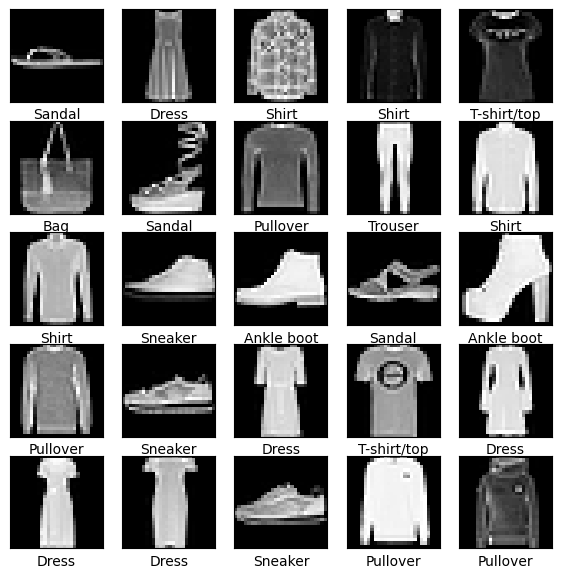

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(7,7))
for i in range(30,55):
    plt.subplot(5,5,i+1-30)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Estructura de la CNN
Aquí se crea la estructura de la parte de **convolución** de la red, se definen las capas que utilizará. Comúnmente se van colocando de forma secuencial capas Conv2D y MaxPooling2D.


In [4]:
model = models.Sequential()
# Aquí puedes modificar el número de filtros de cada capa
# De igual forma podrías agregar nuevas capas, o eliminar alguna
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

### Parte final de la CNN
Una vez que se define la parte convolucional, se agregan algunas capas totalmente conectadas para procesar y clasificar las imágenes.
Como la salida de las capas de convolución es en 3D (e.g. la salida de la última capa Conv2D es de (4,4,64)) primero se debe "aplanar" para poder ingresarla como datos en 1D a las capas densas. Al final se agregan 10 neuronas en la capa de salida, ya que CIFAR tiene 10 clases diferentes.

In [5]:
model.add(layers.Flatten())
# De igual forma, aquí podrías agregar capas Dense
# O bien, modificar el número de neuronas de la existente
# Recuerda que en la última capa son 10 neuronas, porque el problema
# se trata de identificar las imágenes en 10 diferentes clases.
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Y la arquitectura completa queda como sigue:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

### Juntando y entrenando el modelo

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs = 25
history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1875/1875 [==============================] - 23s 6ms/step - loss: 0.6913 - accuracy: 0.7484 - val_loss: 0.5378 - val_accuracy: 0.8059
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4713 - accuracy: 0.8294 - val_loss: 0.4509 - val_accuracy: 0.8401
Epoch 3/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4170 - accuracy: 0.8483 - val_loss: 0.4257 - val_accuracy: 0.8493
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3804 - accuracy: 0.8615 - val_loss: 0.4310 - val_accuracy: 0.8436
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3531 - accuracy: 0.8708 - val_loss: 0.3759 - val_accuracy: 0.8660
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3342 - accuracy: 0.8772 - val_loss: 0.3665 - val_accuracy: 0.8666
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3165 - accuracy: 0.8841 - val_loss: 0.3509 - val_accuracy

### Evaluar el modelo

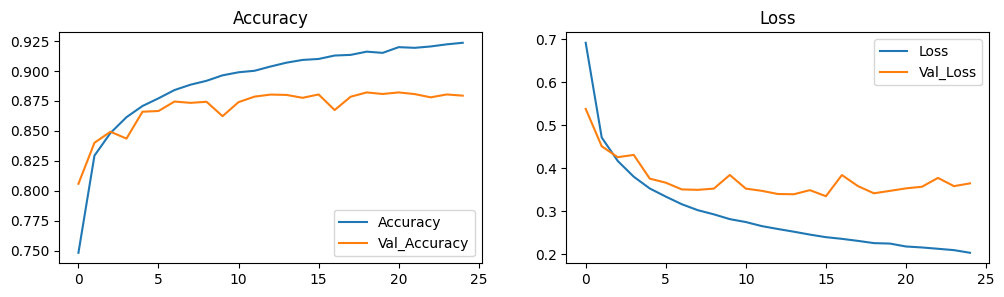

In [8]:
from matplotlib import pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='Val_Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Val_Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()